In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
! cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d pateljay731/panama-electricity-load-forecasting

Dataset URL: https://www.kaggle.com/datasets/pateljay731/panama-electricity-load-forecasting
License(s): unknown
panama-electricity-load-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip panama-electricity-load-forecasting.zip

Archive:  panama-electricity-load-forecasting.zip
replace Predict_Jan.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [112]:
df=pd.read_csv('train.csv')

In [113]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dropout, Flatten

In [114]:
# Assuming df is your DataFrame with datetime column converted to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M')

# Filter out rows where the time is '01:00:00'
filtered_df = df[df['datetime'].dt.time == pd.to_datetime('01:00:00').time()]

In [115]:
filtered_df.reset_index(drop=True, inplace=True)

In [116]:
filtered_df['datetime'] = filtered_df['datetime'].dt.date

C:\Users\Aniket\AppData\Local\Temp\ipykernel_8684\3991792268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['datetime'] = filtered_df['datetime'].dt.date


In [117]:
df = filtered_df

In [118]:
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-04,944.0556,25.681818,0.018494,0.003898,19.893350,23.627130,0.017540,0.006481,8.287433,22.533380,0.016747,0.085571,4.433089,0,0,0
2,2015-01-05,928.5338,25.689905,0.018423,0.018112,20.812843,23.510217,0.016660,0.007763,11.819470,22.400842,0.015913,0.082062,6.599681,0,0,0
3,2015-01-06,914.6895,25.441034,0.017628,0.024033,28.399832,23.605096,0.016590,0.008877,14.222410,22.284784,0.015835,0.088104,7.670477,0,0,0
4,2015-01-07,940.4568,24.863245,0.016943,0.015156,20.156554,22.425745,0.016386,0.015404,10.078216,21.761682,0.015573,0.100281,6.593827,0,0,0


In [119]:
print(df.dtypes)

datetime       object
nat_demand    float64
T2M_toc       float64
QV2M_toc      float64
TQL_toc       float64
W2M_toc       float64
T2M_san       float64
QV2M_san      float64
TQL_san       float64
W2M_san       float64
T2M_dav       float64
QV2M_dav      float64
TQL_dav       float64
W2M_dav       float64
Holiday_ID      int64
holiday         int64
school          int64
dtype: object


In [120]:
df.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [121]:
# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')

# Now you can use .dt accessor
df['week_day'] = df['datetime'].dt.dayofweek
df['date'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

# Display the DataFrame head
df.head()


,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school,week_day,date,month,hour
0,2015-01-03,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,...,0.016562,0.096100,5.364148,0,0,0,5,3,1,0
1,2015-01-04,944.0556,25.681818,0.018494,0.003898,19.893350,23.627130,0.017540,0.006481,8.287433,...,0.016747,0.085571,4.433089,0,0,0,6,4,1,0
2,2015-01-05,928.5338,25.689905,0.018423,0.018112,20.812843,23.510217,0.016660,0.007763,11.819470,...,0.015913,0.082062,6.599681,0,0,0,0,5,1,0
3,2015-01-06,914.6895,25.441034,0.017628,0.024033,28.399832,23.605096,0.016590,0.008877,14.222410,...,0.015835,0.088104,7.670477,0,0,0,1,6,1,0
4,2015-01-07,940.4568,24.863245,0.016943,0.015156,20.156554,22.425745,0.016386,0.015404,10.078216,...,0.015573,0.100281,6.593827,0,0,0,2,7,1,0


<Axes: xlabel='datetime'>

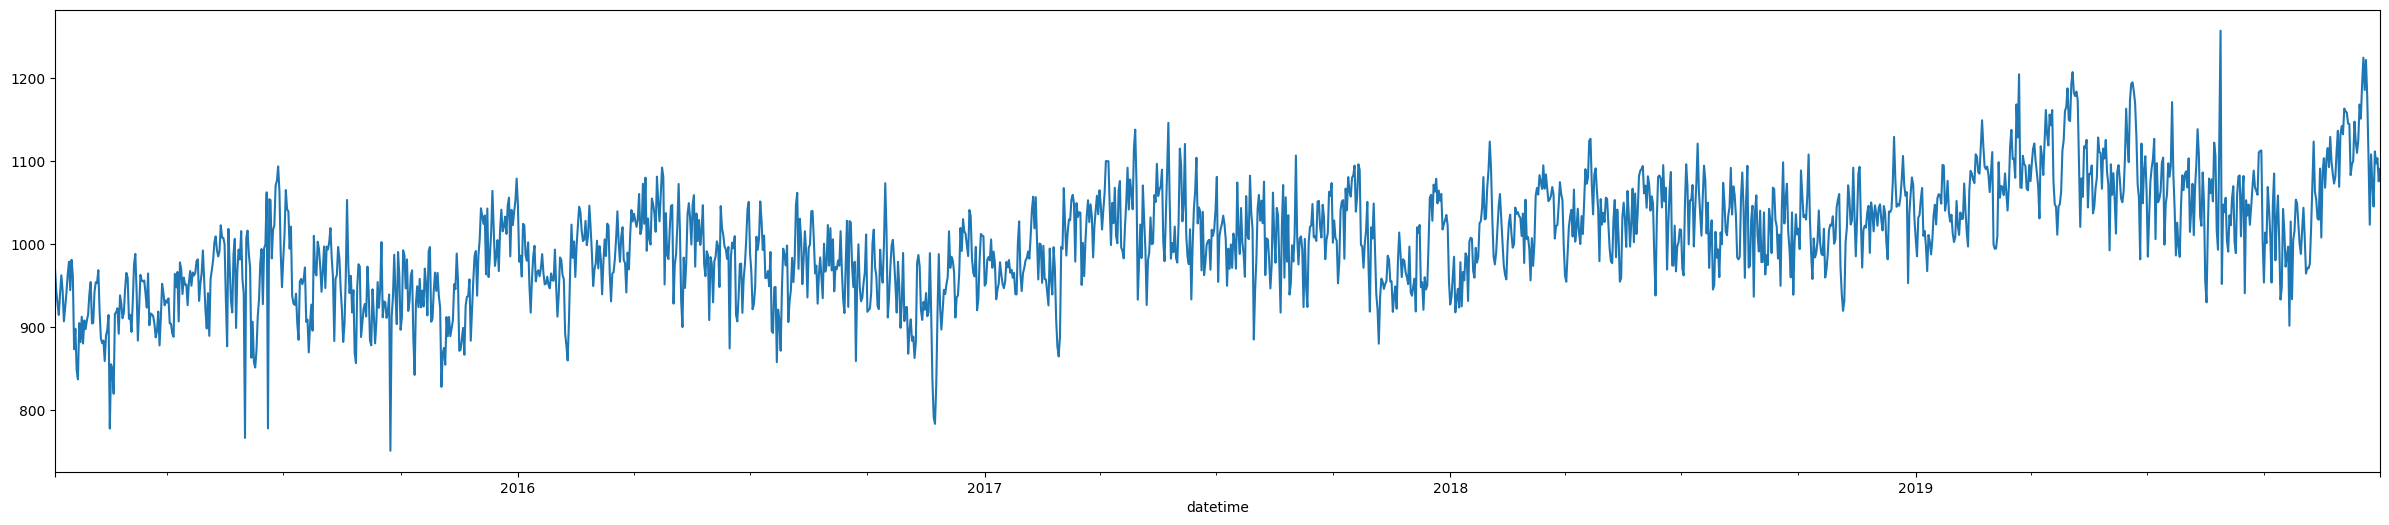

In [122]:
from matplotlib.pyplot import figure
figure(figsize=(30, 6))
ddd=df[0:15000]
ddd.groupby('datetime')['nat_demand'].median().plot()

In [123]:
def add_features(df):
    df['T2M_toc_s']=df['T2M_toc'].shift(-1).fillna(0)
    df['QV2M_toc_s']=df['QV2M_toc'].shift(-1).fillna(0)
    df['TQL_toc_s']=df['TQL_toc'].shift(-1).fillna(0)
    df['W2M_toc_s']=df['W2M_toc'].shift(-1).fillna(0)
    df['T2M_toc_s']=df['T2M_san'].shift(-1).fillna(0)
    df['QV2M_san_s']=df['QV2M_san'].shift(-1).fillna(0)
    df['TQL_san_s']=df['TQL_san'].shift(-1).fillna(0)
    df['W2M_san_s']=df['W2M_san'].shift(-1).fillna(0)
    df['T2M_dav_s']=df['T2M_dav'].shift(-1).fillna(0)
    df['QV2M_dav_s']=df['QV2M_dav'].shift(-1).fillna(0)
    df['TQL_dav_s']=df['TQL_dav'].shift(-1).fillna(0)
    df['W2M_dav_s']=df['W2M_dav'].shift(-1).fillna(0)
    df['Holiday_ID_s']=df['Holiday_ID'].shift(-1).fillna(0)
    df['holiday_s']=df['holiday'].shift(-1).fillna(0)
    df['school_s']=df['school'].shift(-1).fillna(0)

    df['T2M_toc_s1']=df['T2M_toc'].shift(-2).fillna(0)
    df['QV2M_toc_s1']=df['QV2M_toc'].shift(-2).fillna(0)
    df['TQL_toc_s1']=df['TQL_toc'].shift(-2).fillna(0)
    df['W2M_toc_s1']=df['W2M_toc'].shift(-2).fillna(0)
    df['T2M_toc_s1']=df['T2M_san'].shift(-2).fillna(0)
    df['QV2M_san_s1']=df['QV2M_san'].shift(-2).fillna(0)
    df['TQL_san_s1']=df['TQL_san'].shift(-2).fillna(0)
    df['W2M_san_s1']=df['W2M_san'].shift(-2).fillna(0)
    df['T2M_dav_s1']=df['T2M_dav'].shift(-2).fillna(0)
    df['QV2M_dav_s1']=df['QV2M_dav'].shift(-2).fillna(0)
    df['TQL_dav_s1']=df['TQL_dav'].shift(-2).fillna(0)
    df['W2M_dav_s1']=df['W2M_dav'].shift(-2).fillna(0)

    df['nat_demand3']=df['nat_demand'].shift(3).fillna(0)
    df['nat_demand4']=df['nat_demand'].shift(4).fillna(0)
    df['nat_demand5']=df['nat_demand'].shift(5).fillna(0)
    df['nat_demand6']=df['nat_demand'].shift(6).fillna(0)
    df['nat_demand7']=df['nat_demand'].shift(7).fillna(0)
    df['nat_demand8']=df['nat_demand'].shift(8).fillna(0)
    df['nat_demand9']=df['nat_demand'].shift(9).fillna(0)
    df['nat_demand10']=df['nat_demand'].shift(10).fillna(0)
    df['nat_demand11']=df['nat_demand'].shift(11).fillna(0)
    df['nat_demand12']=df['nat_demand'].shift(12).fillna(0)
    df['nat_demand13']=df['nat_demand'].shift(13).fillna(0)
    df['nat_demand14']=df['nat_demand'].shift(14).fillna(0)
    df['nat_demand_n']=df['nat_demand']
    #df = pd.get_dummies(df)
    return df

In [124]:
df1 = add_features(df)

In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      1824 non-null   datetime64[ns]
 1   nat_demand    1824 non-null   float64       
 2   T2M_toc       1824 non-null   float64       
 3   QV2M_toc      1824 non-null   float64       
 4   TQL_toc       1824 non-null   float64       
 5   W2M_toc       1824 non-null   float64       
 6   T2M_san       1824 non-null   float64       
 7   QV2M_san      1824 non-null   float64       
 8   TQL_san       1824 non-null   float64       
 9   W2M_san       1824 non-null   float64       
 10  T2M_dav       1824 non-null   float64       
 11  QV2M_dav      1824 non-null   float64       
 12  TQL_dav       1824 non-null   float64       
 13  W2M_dav       1824 non-null   float64       
 14  Holiday_ID    1824 non-null   int64         
 15  holiday       1824 non-null   int64   

In [126]:
col=['datetime']
demand=df1['nat_demand']
new_df= df1.drop(columns=col)
df_for_training = new_df.astype(float)

# print(df_for_training)

In [127]:
df_for_training.shape

(1824, 58)

In [128]:
import joblib

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [130]:
joblib.dump(scaler, 'scaler_MT.joblib')

['scaler_MT.joblib']

In [131]:
df_for_training_scaled

array([[0.43336192, 0.5522116 , 0.61427046, ..., 0.        , 0.        ,
        0.43336192],
       [0.38141418, 0.51265227, 0.60435126, ..., 0.        , 0.        ,
        0.38141418],
       [0.35074317, 0.51439628, 0.59582088, ..., 0.        , 0.        ,
        0.35074317],
       ...,
       [0.69647226, 0.7409723 , 0.79449222, ..., 0.91573319, 0.92926856,
        0.69647226],
       [0.64138328, 0.63450237, 0.74975236, ..., 0.94926091, 0.91573319,
        0.64138328],
       [0.67089398, 0.53564025, 0.6010677 , ..., 0.97418674, 0.94926091,
        0.67089398]])

In [132]:
scaler

MinMaxScaler()

In [133]:
X=np.array(df_for_training)
print(X)

[[9.70345000e+02 2.58652588e+01 1.85763820e-02 ... 0.00000000e+00
  0.00000000e+00 9.70345000e+02]
 [9.44055600e+02 2.56818176e+01 1.84937400e-02 ... 0.00000000e+00
  0.00000000e+00 9.44055600e+02]
 [9.28533800e+02 2.56899048e+01 1.84226690e-02 ... 0.00000000e+00
  0.00000000e+00 9.28533800e+02]
 ...
 [1.10349830e+03 2.67405640e+01 2.00779030e-02 ... 1.15117350e+03
  1.16818890e+03 1.10349830e+03]
 [1.07561920e+03 2.62468506e+01 1.97051520e-02 ... 1.19332140e+03
  1.15117350e+03 1.07561920e+03]
 [1.09055380e+03 2.57884155e+01 1.84663830e-02 ... 1.22465580e+03
  1.19332140e+03 1.09055380e+03]]


In [134]:
trainX = []
trainY = []
trainY = df_for_training['nat_demand'].to_numpy().reshape(-1,1)
trainX = df_for_training.to_numpy().reshape(-1, 58,1)
#trainY = df[['pressure']].to_numpy().reshape(-1, 80)
#trainX = df.reshape(-1, 80, df.shape[-1])      df_for_training.shape[-1]

In [96]:
df_for_training.shape

(1824, 58)

In [135]:
trainX = []
trainY = []
n_future = 1
n_past = 12
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
   trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
   trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [136]:
trainX, trainY = np.array(trainX), np.array(trainY)
# print(trainX.shape)
print(trainY)

[[0.38234646]
 [0.45464221]
 [0.41743836]
 ...
 [0.69647226]
 [0.64138328]
 [0.67089398]]


In [137]:
# np.set_printoptions(precision=3)
# np.set_printoptions(suppress=True)
# np.set_printoptions(threshold=2000)
#p = PrintArray(precision=4, linewidth=150, suppress=True)
trainX.shape[1]


12

In [138]:
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences=True)))
                             #return_sequences=True))
model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True)))
# model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Bidirectional(LSTM(24, activation='relu', return_sequences=False)))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))#, return_sequences=False))
model.add(Dense(32, activation='relu'))#, return_sequences=False))
model.add(Dense(8, activation='relu'))#, return_sequences=False))
model.add(Dense(trainY.shape[1]))


model.compile(optimizer='adam', loss='mse',metrics=['mse'])




#model 2

# model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# # model.add(Dropout(0.2))
# model.add(LSTM(64,return_sequences=True))
# model.add(LSTM(64))
# # model.add(LSTM(64))
# # model.add(Dropout(0.2))
# model.add(Dense(6))

# # Add Dense layers for final output
# model.add(Dense(32, activation='relu'))
# # model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
#  # Add activation for dense layer
# model.add(Dense(trainY.shape[1]))

# # Compile the model
# model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# model.summary()

c:\Users\Aniket\OneDrive\Desktop\STLF\LSTM-Load-Forecasting\LSTM\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [139]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10,verbose=1,validation_split=0.2)
#validation_split=0.2,


Epoch 1/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 9/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - l

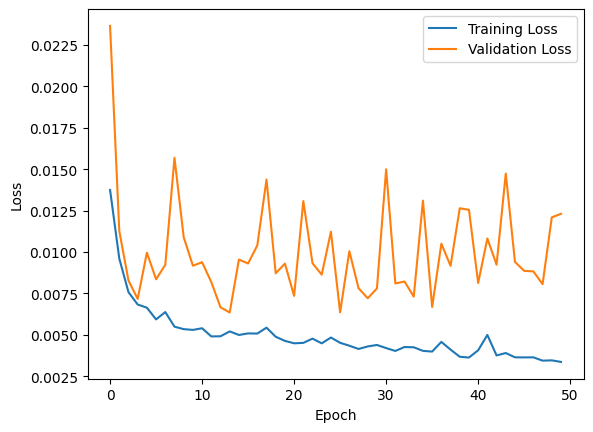

In [140]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [103]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional) │ (16, 24, 128)          │        62,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (16, 24, 64)           │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (16, 48)               │        17,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (16, 48)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (16, 64)               │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (16, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (16, 8)                │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (16, 1)                │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 380,309 (1.45 MB)

 Trainable params: 126,769 (495.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 253,540 (990.39 KB)

In [ ]:
from tensorflow.keras.models import save_model, load_model
save_model(model, "medium_term_model.h5")

<ipython-input-221-709264123324>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "medium_term_model.h5")


In [ ]:
data= pd.read_csv('test_load_forecast.csv')
predicted_y=[]
dates=[]
previousData=[]
time=[]
for i in range(24):
  df_test1=data.iloc[i:i+48]
  df_test1['datetime']=pd.to_datetime(df_test1['datetime'],format='%d-%m-%Y')

  df_test1['week_day']=df_test1['datetime'].dt.dayofweek
  df_test1['date']=df_test1['datetime'].dt.day
  df_test1['month']=df_test1['datetime'].dt.month
  df_test1['hour']=df_test1['datetime'].dt.hour
  # df.head()
  date=data.iloc[i+48,0]
  date=pd.to_datetime(date,format='%d-%m-%Y')
  # time.append(date.dt.time)


  previousData.append(data.iloc[i+48,1])
  df_test2 = add_features(df_test1)

  # df_test1 = add_features(df_test1)
  # print(df_test1.head())
  col=['datetime']
  new_df_test2= df_test2.drop(columns=col)
  df_for_testing1 = new_df_test2.astype(float)
  # print(df_for_testing1)
  # df_for_pred1=df_test1.drop(columns=['datetime'])
  # df_test1=df_for_pred1.astype(float)
  df_pred_scaled1=scaler.transform(df_for_testing1)

  # print(df_pred_scaled1)
  # print(df_test.sha)
  X_pred1 = []
  # for i in range(n_past, len(df_pred_scaled1) - n_future +1):

  X_pred1.append(df_pred_scaled1[0:48, 0:df_for_testing1.shape[1]])


  X_pred1= np.array(X_pred1)
  # print(X_pred1)

  print('X for prediction shape == {}.'.format(X_pred1.shape))
  prediction1 = model.predict(X_pred1)
  print(prediction1.shape)
  prediction1_copies = np.repeat(prediction1, df_for_testing1.shape[1], axis=-1)
  # print(prediction1_copies)
  y_pred_future1 = scaler.inverse_transform(prediction1_copies)[:,0]
  # print(y_pred_future1)
  predicted_y.append(y_pred_future1)
  dates.append(date)
  data.loc[i+48,'nat_demand']=y_pred_future1



# print(predicted_y)


In [36]:
predicted_y

[array([945.4588], dtype=float32),
 array([954.9072], dtype=float32),
 array([952.0858], dtype=float32),
 array([935.97815], dtype=float32),
 array([913.18756], dtype=float32),
 array([896.6631], dtype=float32),
 array([900.73566], dtype=float32),
 array([898.6061], dtype=float32),
 array([907.2536], dtype=float32),
 array([903.5739], dtype=float32),
 array([904.58905], dtype=float32),
 array([906.99036], dtype=float32),
 array([893.1886], dtype=float32),
 array([902.95636], dtype=float32),
 array([903.4843], dtype=float32),
 array([903.28174], dtype=float32),
 array([895.2482], dtype=float32),
 array([872.72394], dtype=float32),
 array([866.1923], dtype=float32),
 array([868.30316], dtype=float32),
 array([873.09143], dtype=float32),
 array([866.05365], dtype=float32),
 array([868.55414], dtype=float32),
 array([871.1456], dtype=float32)]

In [ ]:
previousData

[1086.3027,
 1146.1169,
 1054.9346,
 982.4278,
 1001.2198,
 990.4145,
 1021.1594,
 983.2242,
 977.7237,
 1024.516959,
 1115.0801,
 1095.1115,
 1027.402653,
 1047.9314,
 1120.6625,
 1011.7703,
 985.1806,
 975.8991,
 1017.8908,
 933.326695,
 997.4791,
 1042.1703,
 1063.5381,
 1104.0659]

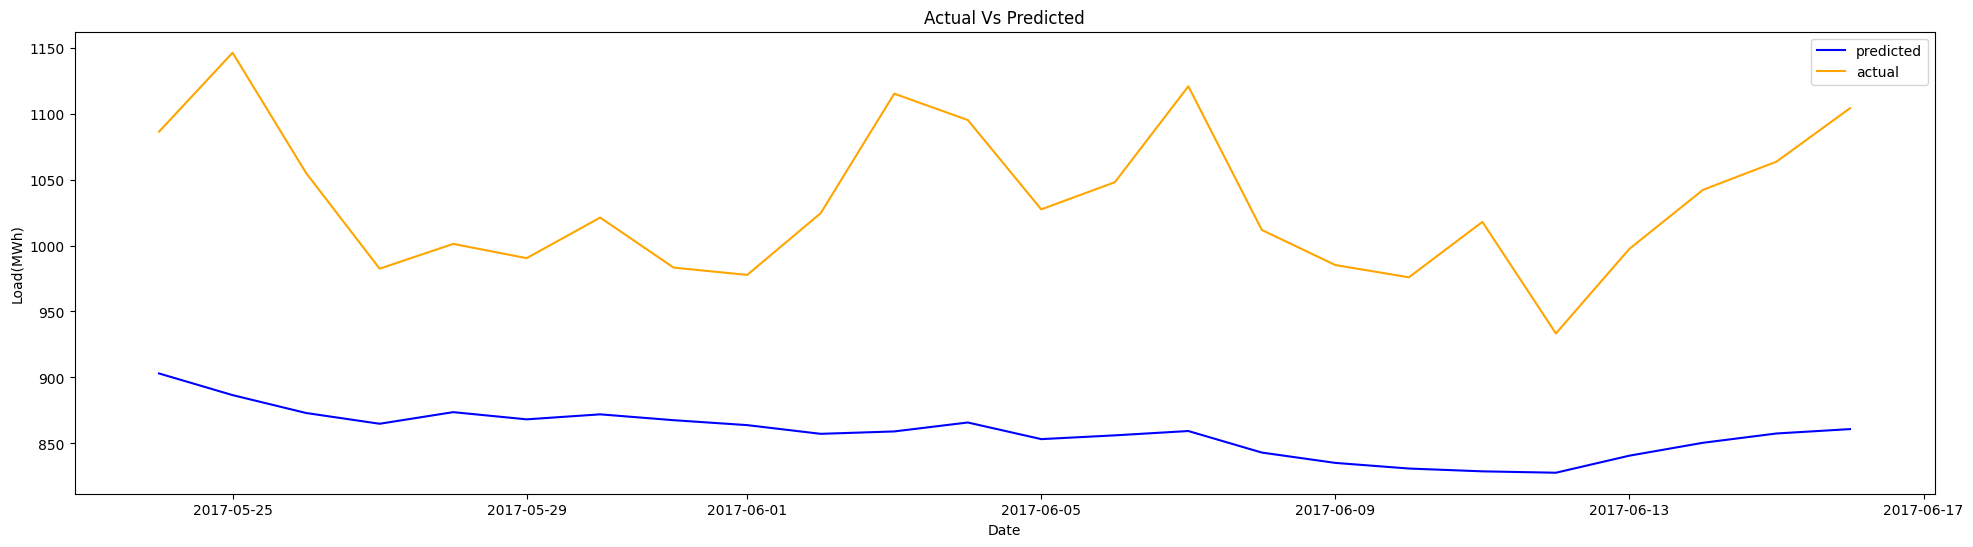

In [142]:
plt.figure(figsize=(24, 6))
plt.plot(dates, predicted_y, label='predicted', color='blue')
plt.plot(dates,previousData , label='actual', color='orange')
plt.title('Actual Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Load(MWh)')
plt.legend()
plt.show()

In [111]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.optimizers import SGD
trainScore = math.sqrt(mean_squared_error(predicted_y, previousData))
print( 'Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(predicted_y, previousData))
print( 'Test Score: %.2f RMSE' % (testScore))

#calculate mean absolute percent error
trainMAPE = mean_absolute_error(predicted_y, previousData)
print('trainMAPE: %.2f MAPE' % trainMAPE)
testMAPE = mean_absolute_error(predicted_y, previousData)
print('testMAPE: %.2f MAPE' % testMAPE)

#calculate mean square error
trainmse = mean_squared_error(predicted_y, previousData)
print('TrainMSE: %.2f MSE' % trainmse)
testmse = mean_squared_error(predicted_y, previousData)
print('TestMSE: %.2f MSE' % testmse)
trainKPI = [];
trainKPI.extend([trainMAPE,trainScore,trainmse])
testKPI = [];
testKPI.extend([testMAPE,testScore,testmse])
print('trainKPI',trainKPI)
print('testKPI',testKPI)

# print('train_size',train_size)
# print('test_size',test_size)

Train Score: 187.14 RMSE
Test Score: 187.14 RMSE
trainMAPE: 180.65 MAPE
testMAPE: 180.65 MAPE
TrainMSE: 35021.10 MSE
TestMSE: 35021.10 MSE
trainKPI [180.64616078971355, 187.1392564198203, 35021.10129336325]
testKPI [180.64616078971355, 187.1392564198203, 35021.10129336325]


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# model.save_weights('shorterm_model_weights.h5')
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder to save in Google Drive
!mkdir /content/drive/MyDrive/my_folder_in_drive

# Copy content to the new Google Drive folder
!cp -r short_term_model//* /content/drive/MyDrive/my_folder_in_drive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/drive/MyDrive/my_folder_in_drive’: File exists
cp: cannot stat 'short_term_model//*': No such file or directory


In [ ]:
prediction1 = model.predict(X_pred1)
prediction1_copies = np.repeat(prediction1, df_for_testing1.shape[1], axis=-1)
y_pred_future1 = scaler.inverse_transform(prediction1_copies)[:,0]
print(y_pred_future1)

1/1 [==============================] - 0s 35ms/step
[959.4149]
